In [2]:
! pip install matplotlib
! pip install pandas 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("C:/EntansTask/sales_data.xlsx")

class DataPreprocessor:
    def Chech_null_value(self):
        print("Null Values:")
        print(df.isnull().sum())
    def duplicate(self):
        print("Duplicate")
        print(df.columns.duplicated())
    def Datatype(self):
        print("Dtype")
        for i in df.columns:
            dtype = df.dtypes[i]
            print(f"{i}{dtype}")
obj = DataPreprocessor()
obj.Chech_null_value()
obj.duplicate()
obj.Datatype()



Null Values:
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64
Duplicate
[False False False False False False False False False False False False
 False False False False False False]
Dtype
Datedatetime64[ns]
Dayint64
Monthobject
Yearint64
Customer_Ageint64
Age_Groupobject
Customer_Genderobject
Countryobject
Stateobject
Product_Categoryobject
Sub_Categoryobject
Productobject
Order_Quantityint64
Unit_Costint64
Unit_Priceint64
Profitint64
Costint64
Revenueint64


In [19]:
class DataAnalyzer:
    def summary(self):
        summary_sts = df.describe()
        print("\nSummary Statistics:")
        summary_sts.to_csv("Summary_statistics.csv")
        print("File saved")
    def unique_counts(self):
        product_category_count = df["Product_Category"].nunique()
        sub_category_count = df["Sub_Category"].nunique()
        product_count = df["Product"].nunique() 
        print("output verified")

analyzer = DataAnalyzer()
analyzer.summary()
analyzer.unique_counts()             


Summary Statistics:
File saved
output verified


Histogram saved as 'customer_age_histogram.png'.


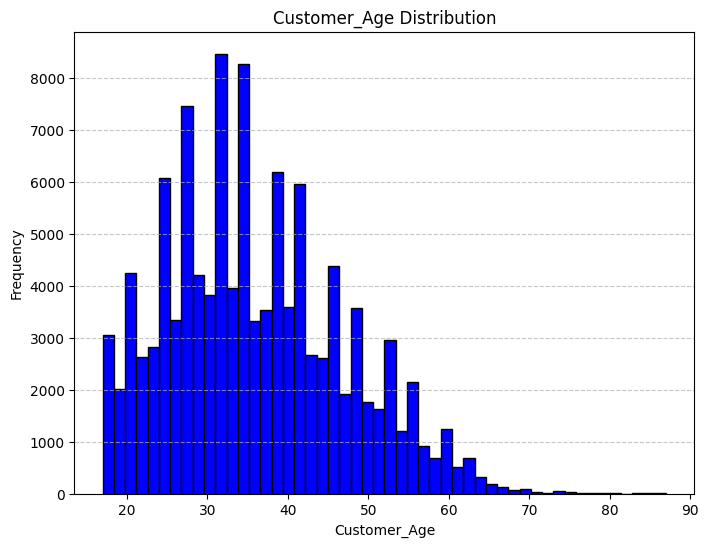

In [23]:
class DataAnalyzer:
    def plot_histogram(self, column,bins = 50, output_file = "histogram.png"):
        if column not in df.columns:
            print(f"{column} Column not found in the datatset")
            return
        plt.figure(figsize=(8,6))
        plt.hist(df[column], bins=bins, color='blue', edgecolor='black')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.savefig(output_file)
        print(f"Histogram saved as '{output_file}'.")
        plt.show()
analyzer= DataAnalyzer()
analyzer.plot_histogram(column="Customer_Age", output_file="customer_age_histogram.png")        

saved''{output_file}'


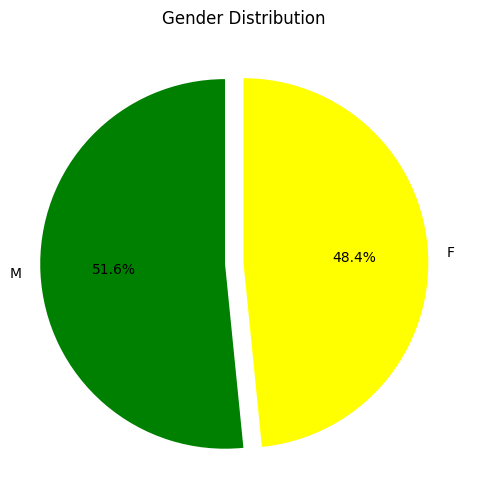

In [13]:
class DataVisualizer:
    def gender_distribution(self, output_file="gender_distribution.png"):
        if "Customer_Gender" not in df.columns:
            print("Column 'Gender' not found")
            return
        gender_counts = df['Customer_Gender'].value_counts()

        plt.figure(figsize=(8,6))
        gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'yellow'], startangle= 90, explode=(0.1, 0))
        plt.title('Gender Distribution')
        plt.ylabel("")
        plt.savefig(output_file)
        print("saved''{output_file}'")
        plt.show()
visualizer = DataVisualizer()
visualizer.gender_distribution()        

Age group revenue chart 'age_group_revenue.png


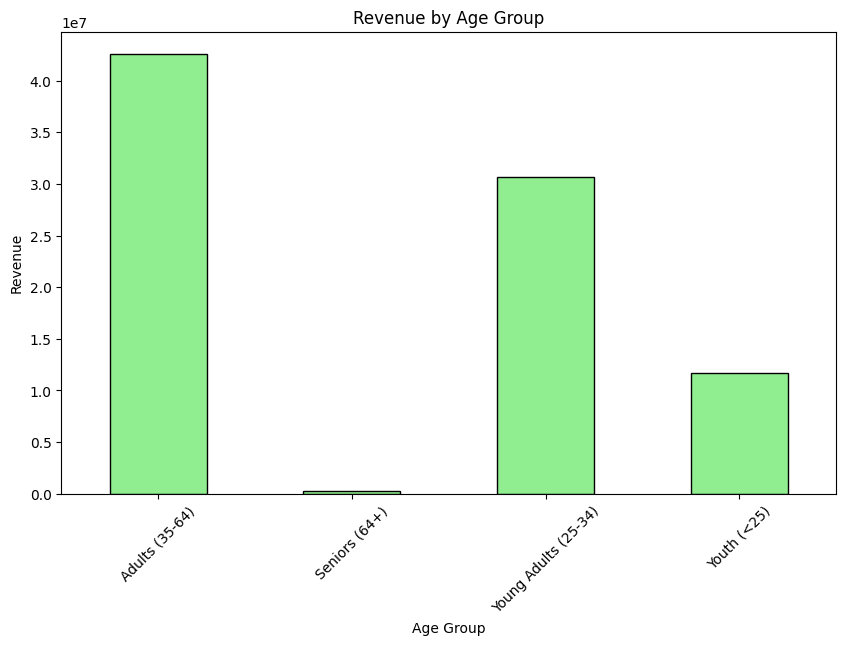

In [14]:
class DataVisualizer:
    def age_group_revenue(self, output_file="age_group_revenue.png"):
        if 'Age_Group' not in df.columns or 'Revenue' not in df.columns:
            print("Columns not found")
            return
        age_group_revenue = df.groupby('Age_Group')["Revenue"].sum()

        plt.figure(figsize=(10,6))
        age_group_revenue.plot(kind='bar', color= 'lightgreen', edgecolor= 'black')
        plt.title("Revenue by Age Group")
        plt.xlabel("Age Group")
        plt.ylabel("Revenue")
        plt.xticks(rotation = 45)
        plt.savefig(output_file)
        print(f"Age group revenue chart '{output_file}")
        plt.show()
visualizer = DataVisualizer()        
visualizer.age_group_revenue()

Product category profit product_category_profit.png


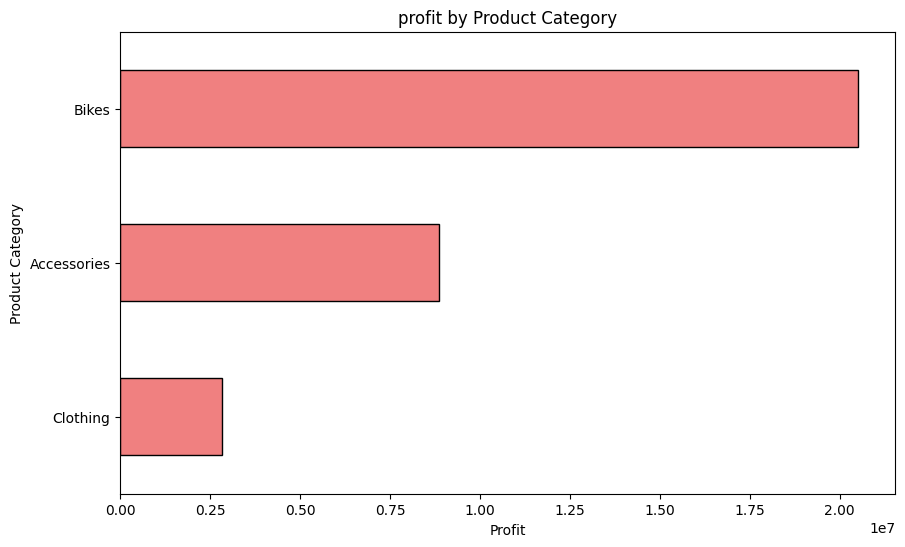

In [15]:
class DataVisualizer:    
    def product_category_profit(self, output_file="product_category_profit.png"):
        if 'Product_Category'not in df.columns or "Profit" not in df.columns:
            print("Columns Product_Category or 'Profit' not found")
            return 
        category_profit = df.groupby('Product_Category')['Profit'].sum().sort_values()

        plt.figure(figsize=(10,6))
        category_profit.plot(kind='barh', color='lightcoral', edgecolor='black')
        plt.title("profit by Product Category")
        plt.xlabel("Profit")
        plt.ylabel("Product Category")
        plt.savefig(output_file)
        print(f"Product category profit {output_file}")
        plt.show()

visualizer = DataVisualizer()
visualizer.product_category_profit()         

Profit margin scatter plot saved as 'profit_margin_scatter.png'.


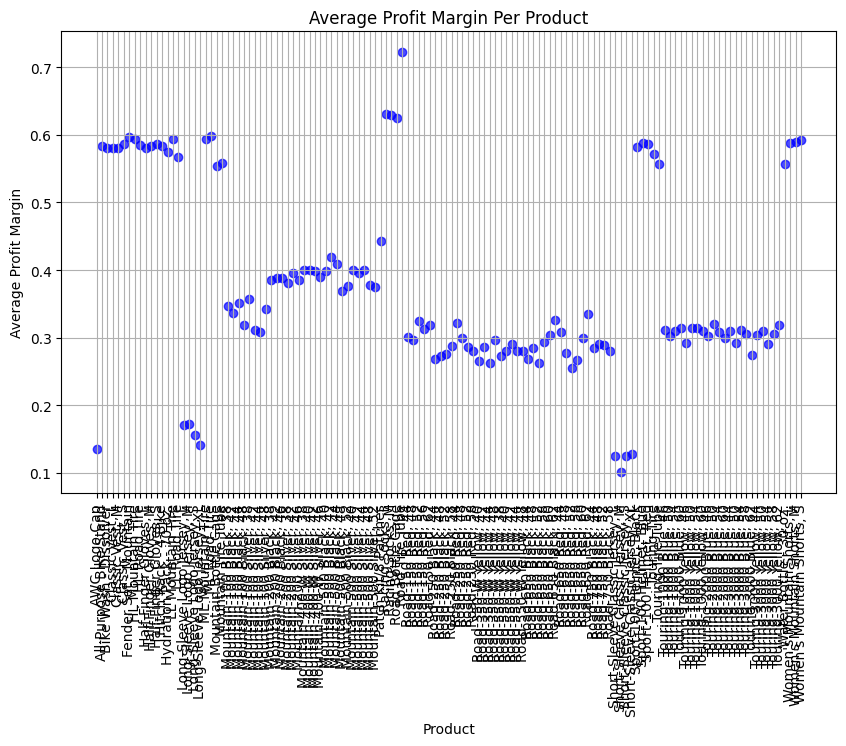

In [16]:
class DataVisualizer:
    def profit_margin(self, output_file="profit_margin_scatter.png"):
        
        if 'Product' not in df.columns or 'Revenue' not in df.columns or 'Profit' not in df.columns:
            print("Columns 'Product', 'Revenue', or 'Profit' not found in the dataset.")
            return

        df['Profit_Margin'] = df['Profit'] / df['Revenue']

        product_profit_margin = df.groupby('Product')['Profit_Margin'].mean()

        plt.figure(figsize=(10, 6))
        plt.scatter(product_profit_margin.index, product_profit_margin.values, color='blue', alpha=0.7)
        plt.title("Average Profit Margin Per Product")
        plt.xlabel("Product")
        plt.ylabel("Average Profit Margin")
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.savefig(output_file)
        print(f"Profit margin scatter plot saved as '{output_file}'.")
        plt.show()
visualizer = DataVisualizer()
visualizer.profit_margin()        

Revenue and profit trends chart saved as 'revenue_profit_2013_05_to_2016_11.png'.


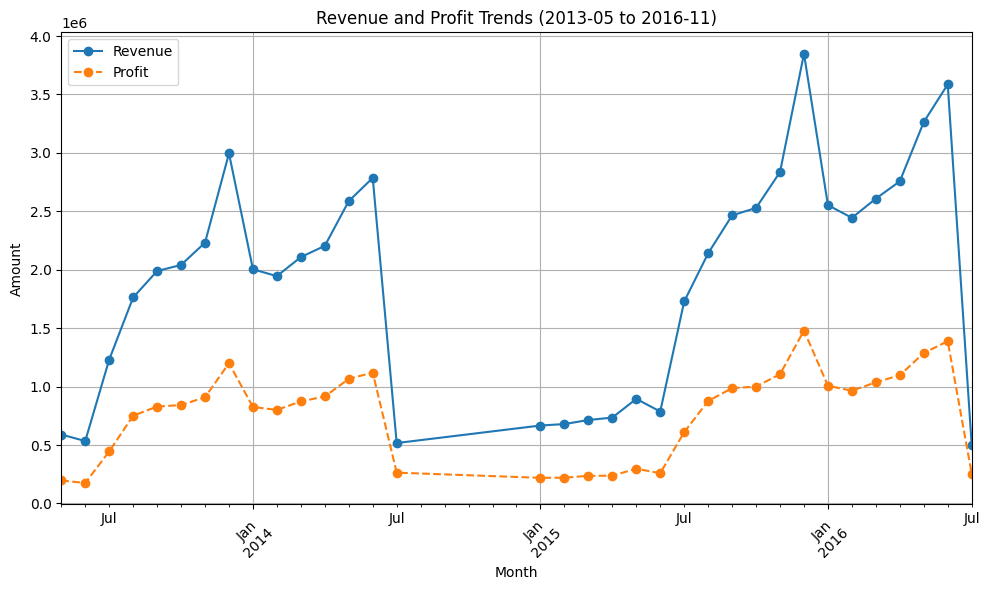

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

class DataVisualizer:
    def __init__(self, dataframe):
        df = dataframe
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])  

    def revenue_profit(self, start_month, start_year, end_month, end_year, output_file='revenue_profit.png'):
        
        if 'Date' not in df.columns or 'Revenue' not in df.columns or 'Profit' not in df.columns:
            print("Columns 'Date', 'Revenue', or 'Profit' not found in the dataset.")
            return

        df['YearMonth'] = df['Date'].dt.to_period('M')

        start_date = f"{start_year}-{start_month:02d}"
        end_date = f"{end_year}-{end_month:02d}"

        filtered_df = df[(df['YearMonth'] >= start_date) & (df['YearMonth'] <= end_date)]

        if filtered_df.empty:
            print(f"No data found for the given range: {start_date} to {end_date}")
            return

        trends = filtered_df.groupby('YearMonth')[['Revenue', 'Profit']].sum()

        plt.figure(figsize=(10, 6))
        trends['Revenue'].plot(label='Revenue', marker='o', linestyle='-')
        trends['Profit'].plot(label='Profit', marker='o', linestyle='--')
        plt.title(f"Revenue and Profit Trends ({start_date} to {end_date})")
        plt.xlabel("Month")
        plt.ylabel("Amount")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        plt.savefig(output_file)
        print(f"Revenue and profit trends chart saved as '{output_file}'.")
        plt.show()

file_path = "C:/EntansTask/sales_data.xlsx"
df = pd.read_excel(file_path)

visualizer = DataVisualizer(df)

start_month = int(input("Enter the start month (1-12): "))
start_year = int(input("Enter the start year: "))
end_month = int(input("Enter the end month (1-12): "))
end_year = int(input("Enter the end year: "))

output_file = f"revenue_profit_{start_year}_{start_month:02d}_to_{end_year}_{end_month:02d}.png"
visualizer.revenue_profit(start_month, start_year, end_month, end_year, output_file=output_file)


Stacked bar chart saved as 'sub_category_performance.png'.


<Figure size 1200x800 with 0 Axes>

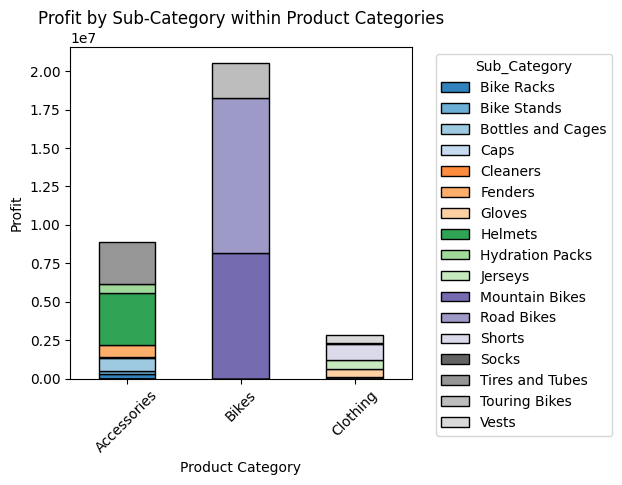

Best-performing Sub-Category by Profit in each Product Category:
  Accessories: Helmets with a total of 3380203
  Bikes: Road Bikes with a total of 10078875
  Clothing: Shorts with a total of 1034342
Stacked bar chart saved as 'sub_category_revenue.png'.


<Figure size 1200x800 with 0 Axes>

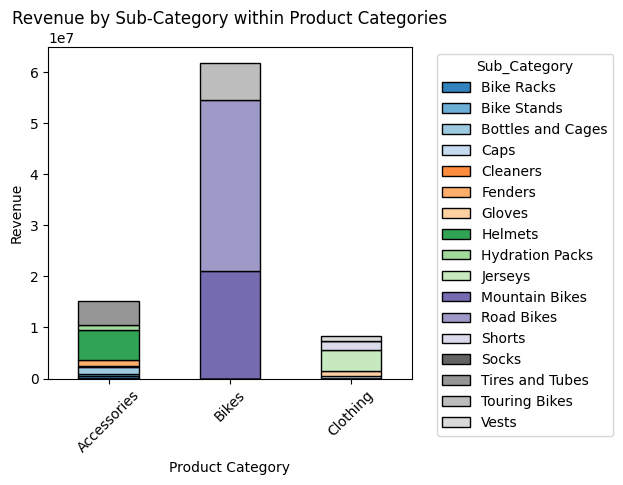

Best-performing Sub-Category by Revenue in each Product Category:
  Accessories: Helmets with a total of 5741081
  Bikes: Road Bikes with a total of 33363061
  Clothing: Jerseys with a total of 4113742


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("C:/EntansTask/sales_data.xlsx")

class DataVisualizer:
    def __init__(self, dataframe):
        df = dataframe  

    def sub_category_performance(self, metric="Profit", output_file="sub_category_performance.png"):
        if 'Product_Category' not in df.columns or 'Sub_Category' not in df.columns or metric not in df.columns:
            print(f"Columns 'Product_Category', 'Sub_Category', or '{metric}' not found in the dataset.")
            return

        grouped_data = df.groupby(['Product_Category', 'Sub_Category'])[metric].sum().unstack()

        plt.figure(figsize=(12, 8))
        grouped_data.plot(kind='bar', stacked=True, colormap='tab20c', edgecolor='black')
        plt.title(f"{metric} by Sub-Category within Product Categories")
        plt.xlabel("Product Category")
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        plt.legend(title="Sub_Category", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(output_file)
        print(f"Stacked bar chart saved as '{output_file}'.")
        plt.show()

        best_performance = df.groupby(['Product_Category', 'Sub_Category'])[metric].sum().groupby(level=0).idxmax()
        print(f"Best-performing Sub-Category by {metric} in each Product Category:")
        for category, sub_category in best_performance.items():
            total = df.groupby(['Product_Category', 'Sub_Category'])[metric].sum()[sub_category]
            print(f"  {category}: {sub_category[1]} with a total of {total}")

visualizer = DataVisualizer(df)
visualizer.sub_category_performance(metric="Profit")
visualizer.sub_category_performance(metric="Revenue", output_file="sub_category_revenue.png")
